In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cftime
import pandas as pd

In [3]:
#Load .nc file for E3SM.HR
path = '/Users/emmabenedict/Desktop/CURO 4970R/'
esm_nc = xr.open_dataset(path + 'E3SM.HR.ne120pg2.0001-0010.US.2x2.5.hourly.PRECC.PRECL.nc')
#High resolution

In [4]:
#esm_nc

In [87]:
#Load variables
lat = esm_nc.lat
lon = esm_nc.lon
time = esm_nc.time
precc = esm_nc.PRECC
precl = esm_nc.PRECL
precip = precc + precl
area = esm_nc.area
#Add PRECC and PRECL
#CC -- Convective Paramaterization processes
#CL -- Large scale processes

In [55]:
#Pick out one year to plot precipitation data
precip_sel = precip.sel(time=slice("0005-01-01 00:00:00","0005-12-31 23:00:00")).mean(dim="time")*1000*60*60*24

In [42]:
print(precip_sel_athens)

<xarray.DataArray (time: 8760)>
array([4.6293717e-04, 6.6881056e-04, 1.3752048e-03, ..., 1.4270248e-09,
       1.6490220e-10, 1.0642824e-11], dtype=float32)
Coordinates:
    lat      float64 34.0
    lon      float64 277.5
  * time     (time) object 0005-01-01 00:00:00 ... 0005-12-31 23:00:00


In [25]:
#Pick out location to plot precipitation data -- Athens, GA
precip_sel_athens = precip_sel.sel(lon=276.64,lat=33.95,method="nearest")*1000*60*60*24

In [92]:
precip_99 = np.percentile(precip_sel_athens, 99)
print(precip_99)

44.046702423095674


In [84]:
precip_mask = np.ma.masked_where(precip_sel >= precip_99, precip_sel)

In [85]:
precip_mask.shape

(21, 33)

In [73]:
precip_mask_athens = precip_mask.sel(lon=276.64,lat=33.95,method="nearest")*1000*60*60*24

AttributeError: 'MaskedArray' object has no attribute 'sel'

In [69]:
precip_mask.shape

(21, 33)

In [89]:
lat1 = np.array("lat")
lon1= np.array("lon")

<Figure size 640x480 with 0 Axes>

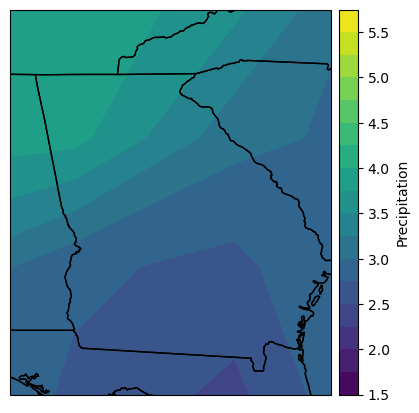

In [91]:
plt.figure()
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-86, -81, 30, 36], crs=ccrs.PlateCarree())  # Set map extent

# Add features to the map
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)
contour = ax.contourf(lon, lat, precip_mask, cmap='viridis', levels = np.arange(1.5,6,0.25),transform=ccrs.PlateCarree())
cbar = plt.colorbar(contour, ax=ax, orientation='vertical', pad=0.01)
cbar.set_label('Precipitation')
# lon_masked = lon1[precip_mask.mask]
# lat_masked = lat1[precip_mask.mask]
# ax.scatter(lon_masked, lat_masked, color='red', marker='o', s=10, zorder=5, label='Threshold Exceeded')

Text(0, 0.5, 'Precip (mm)')

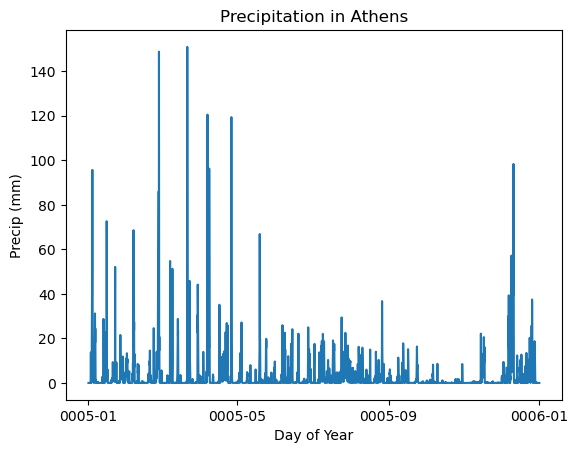

In [49]:
plt.figure()
precip_sel_athens.plot()
plt.title("Precipitation in Athens")
plt.xlabel("Day of Year")
plt.ylabel("Precip (mm)")

<Figure size 640x480 with 0 Axes>

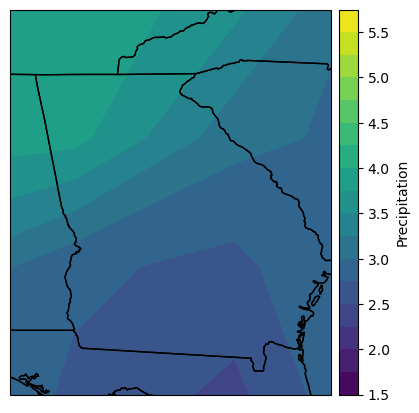

In [58]:
plt.figure()
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-86, -81, 30, 36], crs=ccrs.PlateCarree())  # Set map extent

# Add features to the map
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)
contour = ax.contourf(lon, lat, precip_sel, cmap='viridis', levels = np.arange(1.5,6,0.25),transform=ccrs.PlateCarree())
cbar = plt.colorbar(contour, ax=ax, orientation='vertical', pad=0.01)
cbar.set_label('Precipitation')

In [30]:
precip_filter = precip_sel_athens.where(precip_sel_athens >50)

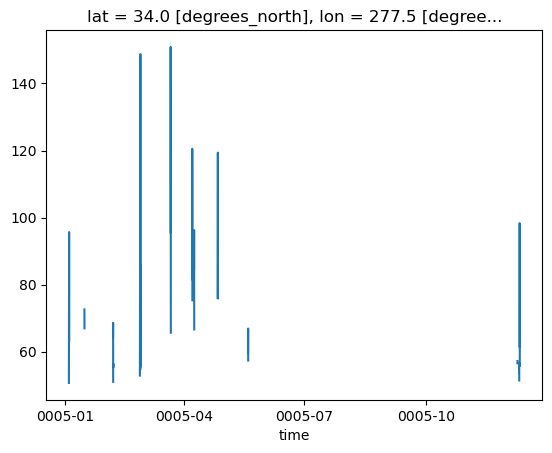

In [31]:
precip_filter.plot()

In [6]:
print(time)

<xarray.DataArray 'time' (time: 87600)>
array([cftime.DatetimeNoLeap(1, 1, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1, 1, 1, 1, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1, 1, 1, 2, 0, 0, 0, has_year_zero=True), ...,
       cftime.DatetimeNoLeap(10, 12, 31, 21, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(10, 12, 31, 22, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(10, 12, 31, 23, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 0001-01-01 00:00:00 ... 0010-12-31 23:00:00
Attributes:
    long_name:     time
    bounds:        time_bnds
    cell_methods:  time: mean


In [13]:
for i in np.arange(0,24,1):
    #print(i)
    precip_slice = precip[i,:,:]
#present day simulations, no interactive oceans repeats for all 10 years
#No el niño, etc. green house gases constant

<Figure size 640x480 with 0 Axes>

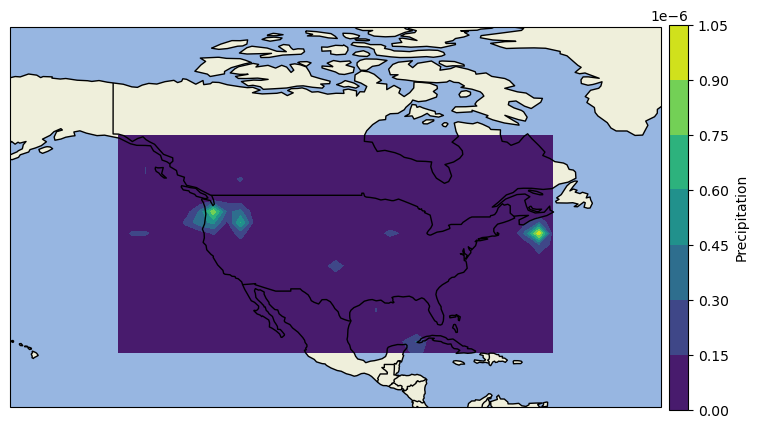

In [14]:
plt.figure()
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-160, -40, 10, 80], crs=ccrs.PlateCarree())  # Set map extent

# Add features to the map
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
contour = ax.contourf(lon, lat, precip_slice, cmap='viridis', transform=ccrs.PlateCarree())
cbar = plt.colorbar(contour, ax=ax, orientation='vertical', pad=0.01)
cbar.set_label('Precipitation')